# Visualize GNoME Crystal Structures

The stable crystals released with the [GNoME](https://www.nature.com/articles/s41586-023-06735-9) paper cover a broad range of the periodic table and exhibit many new prototypes. In this colab, we showcase how the provided dataset can be used with various visualization utilities, allowing researchers to browse the dataset and explore the provided crystal structures.

# Install Visualization Libraries

In [ ]:
#@markdown Installation may require restarting the current colab kernel.
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!pip install vtk matplotlib x3d vapory pymatgen ase
!mamba install -c conda-forge nglview ipywidgets=7


Looking for: ['nglview', 'ipywidgets=7']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [ ]:
from typing import Tuple

import os
import pandas as pd
import shutil
import tempfile
import zipfile

import pymatgen as mg
import pymatgen.io.cif

import ase.io.cif
import ase.visualize
import ase

# Enable custom widgets in colab
from google.colab import output
output.enable_custom_widget_manager()

# Download the Dataset

In [ ]:
PUBLIC_LINK = "https://storage.googleapis.com/"
BUCKET_NAME = "gdm_materials_discovery"

FOLDER_NAME = "gnome_data"
FILES = (
    "stable_materials_summary.csv",
    "by_reduced_formula.zip",
)

def download_from_link(link: str, output_dir: str):
  """Download a file from a public link using wget."""
  os.system(f"wget {link} -P {output_dir}")

parent_directory = os.path.join(PUBLIC_LINK, BUCKET_NAME)
for filename in FILES:
  public_link = os.path.join(parent_directory, FOLDER_NAME, filename)
  download_from_link(public_link, '.')

# Read the contents of the zipfile
# Due to the size of the release, this takes about 30 seconds but prevents
# the need to extract all files in order to read individual structures
z = zipfile.ZipFile('by_reduced_formula.zip')

# Choose A Crystal Structure

In [ ]:
# Parse the summary csv
gnome_crystals = pd.read_csv('stable_materials_summary.csv', index_col=0)
gnome_crystals

,Composition,MaterialId,Reduced Formula,Elements,NSites,Volume,Density,Point Group,Space Group,Space Group Number,...,Corrected Energy,Formation Energy Per Atom,Decomposition Energy Per Atom,Dimensionality Cheon,Bandgap,Is Train,Decomposition Energy Per Atom All,Decomposition Energy Per Atom Relative,Decomposition Energy Per Atom MP,Decomposition Energy Per Atom MP OQMD
0,Cs1S6Zr3,000006a8c4,Cs(ZrS2)3,"['S', 'Zr', 'Cs']",10,302.9202,3.2834,2/m,C2/m,12,...,-70.4155,-1.9058,-0.1625,intercalated ion,0.0023,True,0.0,NaN,-0.1625,-0.0733
1,Nd7Os1Pr3Si5,00011f62be,Pr3Nd7Si5Os,"['Si', 'Pr', 'Nd', 'Os']",16,430.2851,6.8040,1,P1,1,...,-94.0804,-0.5004,-0.0137,3D,0.0022,True,0.0,NaN,-0.0137,-0.0106
2,Ce2La3Pt16Tm15,00012feb99,La3Ce2Tm15Pt16,"['La', 'Ce', 'Tm', 'Pt']",36,828.6647,12.7292,1,P1,1,...,-237.6016,-1.2960,-0.1195,3D,NaN,True,0.0,NaN,-0.1195,-0.1185
3,Mn1Ni1Os2Sb12Yb1,00014cac13,YbMnNi(Sb6Os)2,"['Mn', 'Ni', 'Sb', 'Yb', 'Os']",17,407.2614,8.6776,-1,P-1,2,...,-93.6931,-0.3064,-0.0837,3D,0.0011,True,-0.0,NaN,-0.0837,-0.0772
4,Er8Ge4Si12Zr12,0001759321,Er2Zr3Si3Ge,"['Si', 'Ge', 'Zr', 'Er']",36,727.5283,6.9851,1,P1,1,...,-254.0953,-0.8718,-0.0186,3D,inf,True,-0.0,NaN,-0.0186,-0.0176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384866,Ga3Lu2Si1Tb4,ffff0b1194,Tb4Lu2Ga3Si,"['Si', 'Ga', 'Tb', 'Lu']",10,245.5848,8.2687,mm2,Amm2,38,...,-48.0143,-0.5925,-0.0143,3D,0.0009,True,0.0,NaN,-0.0143,-0.0138
384867,Au1Cd3Sm3Sn2,ffff3e9e89,Sm3Cd3Sn2Au,"['Cd', 'Sn', 'Sm', 'Au']",9,229.2117,8.8579,-6m2,P-62m,189,...,-33.6678,-0.6056,-0.0218,3D,0.0198,True,-0.0,NaN,-0.0218,-0.0217
384868,Ba1H30Th7,ffff611aad,BaTh7H30,"['H', 'Ba', 'Th']",38,391.5742,7.5986,3,R3,146,...,-178.4183,-0.6005,-0.0252,intercalated ion,2.5688,True,0.0,NaN,-0.0252,-0.0251
384869,Al2Bi8K6Sr6,ffff99b793,K3Sr3AlBi4,"['Al', 'K', 'Sr', 'Bi']",22,876.4484,4.7103,6mm,P6_3mc,186,...,-68.7495,-0.6063,-0.0189,intercalated ion,NaN,True,0.0,NaN,-0.0189,-0.0068


In [ ]:
def obtain_structure(
    reduced_formula: str | None = None,
) -> Tuple[ase.Atoms, mg.core.Structure]:
  """Obtain the structure from a provided reduced formula."""
  temp_dir = tempfile.TemporaryDirectory()
  extension = f"{reduced_formula}.CIF"
  temp_path = os.path.join(temp_dir.name, extension)

  with z.open(os.path.join('by_reduced_formula', extension)) as zf:
    with open(temp_path, 'wb') as fp:
      shutil.copyfileobj(zf, fp)

  atoms = ase.io.read(temp_path)
  structure = mg.core.Structure.from_file(temp_path)
  temp_dir.cleanup()
  return atoms, structure

In [ ]:
# @title Provide a reduced formula to select from the GNoME dataset.
# @markdown For a random structure, set the reduced formula to 'random' \\
# @markdown Make sure to run this cell to select this select the formula.

reduced_formula = 'random' # @param {type:"string"}

if reduced_formula == 'random':
  sample = gnome_crystals.sample()
  reduced_formula = sample['Reduced Formula'].item()
else:
  # Ensure that composition entries are converted to reduced formulas
  reduced_formula = mg.core.Composition(reduced_formula).reduced_formula
  sample = gnome_crystals[
      gnome_crystals['Reduced Formula'] == reduced_formula].iloc[0:1]

atoms, structure = obtain_structure(reduced_formula)

/usr/local/lib/python3.10/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [ ]:
sample

,Composition,MaterialId,Reduced Formula,Elements,NSites,Volume,Density,Point Group,Space Group,Space Group Number,...,Corrected Energy,Formation Energy Per Atom,Decomposition Energy Per Atom,Dimensionality Cheon,Bandgap,Is Train,Decomposition Energy Per Atom All,Decomposition Energy Per Atom Relative,Decomposition Energy Per Atom MP,Decomposition Energy Per Atom MP OQMD
260756,Pt9Si7Ti3Y2,ad74985ad3,Y2Ti3Si7Pt9,"['Si', 'Ti', 'Y', 'Pt']",21,336.8556,11.2086,-6,P-6,174,...,-151.6568,-1.0677,-0.0541,3D,0.0047,True,0.0,NaN,-0.0541,-0.0532


## Example \#1: X3D via ASE

A simplified viewer based on X3D is provided by [ASE](https://wiki.fysik.dtu.dk/ase/) and provides visualization capabilities with minimal addtional dependencies.


In [ ]:
ase.visualize.view(atoms, viewer='x3d')

## Example \#2: nglview via ASE

nglview provides tooling to interactively view molcular structures, with significant flexibility including colors of the associated atoms. Notably, this tooling relies on ipywidgets (where the latest version 8 often fails to display
in colab). We have fixed this by using ipywidgets 7 in the installation abvoe
but note that adjustments might cause this tooling to not be displayed.

In [ ]:
ase.visualize.view(atoms, viewer='ngl')

# Example \#3: Matplotlib via ASE

Finally, due to the prevalence of matplotlib, we also use ASE utilities to provide a strategy for creating figures from the associated crystal structure.

<Axes: >

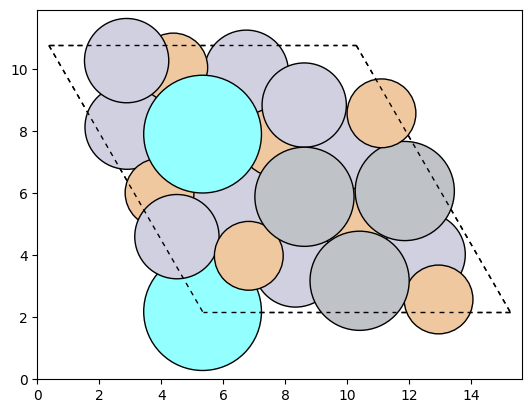

In [ ]:
from ase.visualize.plot import plot_atoms
plot_atoms(atoms)

Additional tooling for crystals structures is made available through libraries such as Pymatgen (in the pymatgen.vis library). We included the above 3 examples due to compatability with colabs, but if anyone wants to include additional visualization examples, please feel free to extend this colab.

# Download files for local visualization:

Finally, we provide a mechanism for downloading various formats of the chosen structure. Please adjust the desired format via the drop down bar on the right
and run the cell below to download the associated file.

In [ ]:
from google.colab import files
import tempfile
import os
from tempfile import mkstemp

fmt = "cif" #@param ['cif', 'poscar', 'cssr', 'json', 'yaml', 'yml', 'xsf', 'mcsqs', 'res', 'pwmat']
temp_dir = tempfile.TemporaryDirectory()
filename = os.path.join(temp_dir.name, f"{structure.reduced_formula}.{fmt}")
structure.to(filename, fmt=fmt)
files.download(filename)
temp_dir.cleanup()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>